# <center>TEMA: Modelo predictivo para detección temprana de la morosidad en una entidad Financiera.<center>

---
# Objetivo
---

El objetivo es seleccionar el mejor modelo predictivo para detección temprana de la morosidad en una entidad bancaria en el país de Ecuador, la visualización del modelo se lo realizara mediante la herramienta de Business Intelligence (Power BI) para poder realizar tomas de decisiones correctas y para obtener el modelo se aplicará algoritmos de Machine Learning con el lenguaje python. Esto ayudara significativamente a la entidad bancaria a identificar a socios que no son buena paga. La información se obtendrá de la base de datos relacional que lo tienen en la entidad bancaria y si es necesario datos de otras entidades bancaria se obtendrán de la página web de la SEPS (Superintendencia de Economía Popular y Solidaria).

Para esta actividad se a trabajar con el modelo de CRISP-DM (Cross-Industry Standard Process for Data Mining), es flexible y se pueden personalizar fácilmente. Por ejemplo, si su organización intenta detectar actividades de blanqueo de dinero, es probable que necesite realizar una criba de grandes cantidades de datos sin un objetivo de modelado específico. En lugar de realizar el modelado, su trabajo se centrará en explorar y visualizar datos para descubrir patrones sospechosos en datos financieros. CRISP-DM permite crear un modelo de minería de datos que se adapte a sus necesidades concretas.

Las etapas de este modelo son las siguientes:
1. Comprension del negocio
2. Comprension de los datos
3. Preparacion de los datos
4. Modelado
5. Evaluacion
6. Despliegue


---
# Comprension del negocio
---


A continuación, se abordara cada una de las actividades que conforman la primera fase en de la metodologia CRISP-DM. El propósito principal de esta etapa es identificar los objetivos y requisitos del proyecto desde una perspectiva empresarial. Más adelante, se transformarán estos objetivos en metas técnicas y se desarrollará un plan de proyecto.

In [ ]:
pip install mitosheet

In [ ]:
pip install ydata_profiling

In [ ]:
pip install sweetviz


En esta base es familiarizarse con los datos disponibles en
en la entidad bancaria, Esta informacion esta alojada en una base relacional, se realizo una vista con los caracteristicas que seva utilizar en el proyecto y posteriormente se importo a un arvhivo csv para carga en el notebook y realizar los modelos predictivos.


En las siguientes secciones se detallara el contenido y resultados para la recopilacion de datos relevantes, explorara y analizar los datos para comprender su calidad y contenido.

In [1]:
# Imports generales
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import itertools
from numpy import corrcoef, transpose, arange
from pylab import pcolor, show, colorbar, xticks, yticks
from sklearn.cluster import KMeans
from sklearn import preprocessing
import plotly.express as px
import mitosheet
from ydata_profiling import ProfileReport
import warnings
import sweetviz as sw

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


In [2]:
# Carga del dataset desde el driver
df = pd.read_csv('morosidad.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104339 entries, 0 to 104338
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   numeroCliente               104339 non-null  int64  
 1   tipoIdentificacion          104339 non-null  object 
 2   codigoOficina               104339 non-null  int64  
 3   parroquia                   104339 non-null  object 
 4   canton                      104339 non-null  object 
 5   provincia                   104339 non-null  object 
 6   edad                        104339 non-null  int64  
 7   queSexo                     104339 non-null  object 
 8   estadoCivil                 104339 non-null  object 
 9   nivelEducacion              104339 non-null  object 
 10  profesion                   104339 non-null  object 
 11  paisOrigen                  104339 non-null  object 
 12  queVivienda                 104339 non-null  object 
 13  tieneApoderado

---
# Entendimiento de los datos
---

In [ ]:
#Reporte para anilisis de los datos
warnings.filterwarnings('ignore')

reporte_completo = sw.analyze(df)
reporte_completo.show_html(filepath='reporte_datos_morosidad.html',
            open_browser=True,
            layout='vertical',
            scale=None)

In [3]:
# Contar campos numéricos
campos_numericos = df.select_dtypes(include=['number']).columns
num_campos_numericos = len(campos_numericos)

# Contar campos de cadena
campos_cadena = df.select_dtypes(include=['object']).columns
num_campos_cadena = len(campos_cadena)

print("Número de campos numéricos:", num_campos_numericos)
print("Número de campos de cadena:", num_campos_cadena)

Número de campos numéricos: 13
Número de campos de cadena: 18


In [4]:
#Validar si existe valores duplicados
df.duplicated().sum()

0

In [5]:
df.describe(include='all')

,numeroCliente,tipoIdentificacion,codigoOficina,parroquia,canton,provincia,edad,queSexo,estadoCivil,nivelEducacion,...,grupoEconomico,diasMaxMorosidad,cantidadPrestamos,cantidadInversiones,tipoProducto,estadoPrestamo,numeroCuotas,tasaInteres,montoPrestamo,esMoroso
count,104339.000000,104339,104339.000000,104339,104339,104339,104339.000000,104339,104339,104339,...,104339,101236.000000,101556.000000,101556.000000,101236,101236,101236.000000,101236.000000,101236.000000,101556
unique,NaN,2,NaN,548,164,24,NaN,2,5,6,...,93,NaN,NaN,NaN,5,7,NaN,NaN,NaN,2
top,NaN,C,NaN,"BAÑOS, BAÑOS DE AGUA SANTA",AMBATO,TUNGURAHUA ...,NaN,H,C,S,...,"AGRICULTURA, GANADERÍA, CAZA Y ACTIVIDADES DE ...",NaN,NaN,NaN,MICROCREDITO,Z,NaN,NaN,NaN,NO
freq,NaN,104336,NaN,5161,30658,59641,NaN,59106,59344,46684,...,17524,NaN,NaN,NaN,56796,65141,NaN,NaN,NaN,73182
mean,609798.352064,NaN,9.159729,NaN,NaN,NaN,48.639205,NaN,NaN,NaN,...,NaN,89.017741,3.376590,1.450028,NaN,NaN,36.292663,16.443987,9821.232733,NaN
std,250009.396893,NaN,14.797443,NaN,NaN,NaN,13.839999,NaN,NaN,NaN,...,NaN,228.799192,4.038401,7.114259,NaN,NaN,21.302283,3.488787,12550.055299,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN,19.000000,NaN,NaN,NaN,...,NaN,0.000000,1.000000,0.000000,NaN,NaN,1.000000,3.330000,14.890000,NaN
25%,567584.500000,NaN,2.000000,NaN,NaN,NaN,38.000000,NaN,NaN,NaN,...,NaN,0.000000,1.000000,0.000000,NaN,NaN,24.000000,14.500000,3000.000000,NaN
50%,679960.000000,NaN,6.000000,NaN,NaN,NaN,47.000000,NaN,NaN,NaN,...,NaN,12.000000,2.000000,0.000000,NaN,NaN,36.000000,15.500000,6003.010000,NaN
75%,782024.000000,NaN,11.000000,NaN,NaN,NaN,58.000000,NaN,NaN,NaN,...,NaN,50.000000,4.000000,0.000000,NaN,NaN,48.000000,18.990000,10318.500000,NaN


In [ ]:
# Generacion de reporte de morosidad para la revision de la calidad de los datos
reporte_morosidad = ProfileReport(df, title="Reporte: datos de morosidad")
reporte_morosidad.to_file("reporte_morosidad.html")

---
# Preparacion de los datos
---

Aqui se realiza la exploracion de los datos con el objetivos de tener datos limpios para poder aplicar clustering. A continuacion se realiza la Exploracion de los datos.


In [ ]:
#Se obtiene el numero de filas y columnas del dataset
df.shape

Antes de seguir con la exploracion se detalla todas las caracteristicas del dataset, que nos va ayudar a conocer mas profundamente los datos que estamos analizando.

In [ ]:
# Se obtiene 10 registros aliatoriamente, esto sirve para visualizar los registros y darnos cuenta como esta poblada nuestra data
display(df.sample(10))

In [6]:
display(df.esMoroso.describe())

count     101556
unique         2
top           NO
freq       73182
Name: esMoroso, dtype: object

In [ ]:
# Variable objetivo o dependiente
print(df['esMoroso'].unique())

In [ ]:
display(df.info())

In [ ]:
display(df.columns)

In [ ]:
# Mostrar si existen datos nulos
df.isnull().sum()

In [7]:
# Elimina las filas con valores nulos en 'esMoroso' porque la informacion para identificar la morosidad esta desde el anio 2000 por este motivo se procede
# a aliminar
df.dropna(subset=['diasMaxMorosidad'], inplace=True)
df.isnull().sum()

numeroCliente                 0
tipoIdentificacion            0
codigoOficina                 0
parroquia                     0
canton                        0
provincia                     0
edad                          0
queSexo                       0
estadoCivil                   0
nivelEducacion                0
profesion                     0
paisOrigen                    0
queVivienda                   0
tieneApoderado                0
obligadoLlevarContabilidad    0
estado                        0
asesor                        0
ingresos                      0
egresos                       0
activos                       0
pasivos                       0
grupoEconomico                0
diasMaxMorosidad              0
cantidadPrestamos             0
cantidadInversiones           0
tipoProducto                  0
estadoPrestamo                0
numeroCuotas                  0
tasaInteres                   0
montoPrestamo                 0
esMoroso                      0
dtype: i

In [ ]:
# Generacion de reporte de morosidad para la revision de la calidad de los datos
reporte_morosidad = ProfileReport(df, title="Reporte: datos de morosidad")
reporte_morosidad.to_file("reporte_morosidad.html")

DATOS FUERA DE RANGO

In [8]:
# Eliminar los datos que no están en el rango de edades entre 18 y 80 años del DataFrame original
df.drop(df[~df['edad'].between(18, 80)].index, inplace=True)

In [9]:
# Eliminar los datos de ingresos
df.drop(df[~df['ingresos'].between(0, 300000)].index, inplace=True)

In [10]:
# Eliminar los datos de egresos
df.drop(df[~df['egresos'].between(0, 290000)].index, inplace=True)

In [11]:
# Eliminar los datos de activos
df.drop(df[~df['activos'].between(0, 999999999)].index, inplace=True)

In [12]:
# Eliminar los datos de pasivos
df.drop(df[~df['pasivos'].between(0, 999999999)].index, inplace=True)

In [13]:
# Eliminar los datos de diasMaxMorosidad
df.drop(df[~df['diasMaxMorosidad'].between(0, 1500)].index, inplace=True)

In [14]:
# Eliminar los datos de cantidadPrestamos
df.drop(df[~df['cantidadPrestamos'].between(1, 999999999)].index, inplace=True)

In [15]:
# Eliminar los datos de cantidadInversiones
df.drop(df[~df['cantidadInversiones'].between(0, 999999999)].index, inplace=True)

In [16]:
# Eliminar los datos de numeroCuotas
df.drop(df[~df['numeroCuotas'].between(1, 200)].index, inplace=True)

In [17]:
# Eliminar los datos de numeroCuotas
df.drop(df[~df['tasaInteres'].between(3.33, 25)].index, inplace=True)

In [18]:
# Eliminar los datos de montoPrestamo
df.drop(df[~df['montoPrestamo'].between(100, 350000)].index, inplace=True)

In [ ]:
df.info()

In [ ]:
# Generacion de reporte de morosidad para la revision de la calidad de los datos
reporte_morosidad = ProfileReport(df, title="Reporte: datos de morosidad")
reporte_morosidad.to_file("reporte_morosidad.html")

In [19]:
# Selecciona solo las columnas numéricas
campos_numericos = df.select_dtypes(include=['number'])

# Calcula el rango intercuartílico (IQR) para cada columna numérica
Q1 = campos_numericos.quantile(0.25, axis=0)
Q3 = campos_numericos.quantile(0.75, axis=0)
IQR = Q3 - Q1

# Identifica valores atípicos usando la regla del IQR
outliers = ((campos_numericos < (Q1 - 1.5 * IQR)) | (campos_numericos > (Q3 + 1.5 * IQR)))

# Muestra la cantidad de valores atípicos encontrados en cada columna
print(outliers.sum())


numeroCliente          13320
codigoOficina           2213
edad                       0
ingresos                9849
egresos                10824
activos                 6315
pasivos                 9786
diasMaxMorosidad       13205
cantidadPrestamos       7540
cantidadInversiones    16351
numeroCuotas            1897
tasaInteres                7
montoPrestamo           7598
dtype: int64


In [57]:
df_filtrado = df[(df['tipoIdentificacion'] == 'C') & 
                 (df['obligadoLlevarContabilidad'] == 'SI') & 
                 (df['tieneApoderado'] == 'SI')]

# Mostrar el DataFrame filtrado
display(df_filtrado)

KeyError: 'tipoIdentificacion'

In [21]:
# Lista de nombres de columnas a eliminar
columnas_a_eliminar = ['tieneApoderado', 'obligadoLlevarContabilidad', 'estado', 'tipoIdentificacion']

# Elimina las columnas especificadas del DataFrame original
df.drop(columns=columnas_a_eliminar, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99336 entries, 0 to 104338
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   numeroCliente        99336 non-null  int64  
 1   codigoOficina        99336 non-null  int64  
 2   parroquia            99336 non-null  object 
 3   canton               99336 non-null  object 
 4   provincia            99336 non-null  object 
 5   edad                 99336 non-null  int64  
 6   queSexo              99336 non-null  object 
 7   estadoCivil          99336 non-null  object 
 8   nivelEducacion       99336 non-null  object 
 9   profesion            99336 non-null  object 
 10  paisOrigen           99336 non-null  object 
 11  queVivienda          99336 non-null  object 
 12  asesor               99336 non-null  object 
 13  ingresos             99336 non-null  float64
 14  egresos              99336 non-null  float64
 15  activos              99336 non-null

In [22]:
#Cambiar el indice por la columna numeroCliente
df = df.set_index('numeroCliente')

![image.png](attachment:2dc0f3bc-18c7-483a-a8f4-d5d0f563b7d8.png)

In [23]:
# Crea una nueva columna combinando 'parroquia' y 'canton'
df['parroquia_canton'] = df['parroquia'] + '_' + df['canton']

# Verifica la cantidad de valores únicos en la nueva columna
unique_combinaciones = df['parroquia_canton'].nunique()

# Puedes quedarte con la nueva columna y eliminar las columnas originales si lo deseas
df = df.drop(['parroquia', 'canton'], axis=1)

# Verifica nuevamente la cantidad de valores únicos después de la combinación
unique_combinaciones_despues = df['parroquia_canton'].nunique()

print(f'Número de combinaciones únicas antes de la unión: {unique_combinaciones}')
print(f'Número de combinaciones únicas después de la unión: {unique_combinaciones_despues}')

Número de combinaciones únicas antes de la unión: 584
Número de combinaciones únicas después de la unión: 584


In [24]:
# Contar la cantidad de valores únicos en la columna 'parroquia_canton'
unique_values_count = df['parroquia_canton'].nunique()

# Obtener la cantidad total de filas en el DataFrame
total_rows = df.shape[0]

# Calcular el porcentaje de valores únicos
percentage_unique = (unique_values_count / total_rows) * 100

# Imprimir el resultado
print(f'Cantidad de valores únicos en parroquia_canton: {unique_values_count}')
print(f'Total de filas en el DataFrame: {total_rows}')
print(f'Porcentaje de valores únicos: {percentage_unique:.2f}%')


Cantidad de valores únicos en parroquia_canton: 584
Total de filas en el DataFrame: 99336
Porcentaje de valores únicos: 0.59%


In [ ]:
df.isnull().sum()

In [ ]:
df

In [ ]:
print(df.info())

In [ ]:
CAMBIAO DE CARACTERISTICAS CATEGORICAS A NUMERICAS

Como se puede evidenciar existe datos caracteristicas numericas y categoricas

In [ ]:
# Generacion de reporte de morosidad para la revision de la calidad de los datos
reporte_morosidad = ProfileReport(df, title="Reporte: datos de morosidad")
reporte_morosidad.to_file("reporte_morosidad.html")

In [25]:
# Filtrar las caracteristicas que son de tipo numerica
columnas_no_object = df.select_dtypes(exclude=['object']).columns
display(columnas_no_object)

Index(['codigoOficina', 'edad', 'ingresos', 'egresos', 'activos', 'pasivos',
       'diasMaxMorosidad', 'cantidadPrestamos', 'cantidadInversiones',
       'numeroCuotas', 'tasaInteres', 'montoPrestamo'],
      dtype='object')

In [26]:
# Filtrar las caracteristicas que son de tipo catergorica
columnas_object = df.select_dtypes(include=['object']).columns
display(columnas_object)

Index(['provincia', 'queSexo', 'estadoCivil', 'nivelEducacion', 'profesion',
       'paisOrigen', 'queVivienda', 'asesor', 'grupoEconomico', 'tipoProducto',
       'estadoPrestamo', 'esMoroso', 'parroquia_canton'],
      dtype='object')

Acontinuacion se va a binarizar tocas las caractericas categoricas en numericas

In [27]:
# dividir la categorica provincia en 1 = sierra, 2 = costa y 3 = orientes
# Variable objetivo o dependiente
print(df['provincia'].unique())

['CHIMBORAZO                                        '
 'GUAYAS                                            '
 'TUNGURAHUA                                        '
 'PASTAZA                                           '
 'COTOPAXI                                          '
 'NAPO                                              '
 'PICHINCHA                                         '
 'ESMERALDAS                                        '
 'ORELLANA                                          '
 'IMBABURA                                          '
 'BOLIVAR                                           '
 'MORONA SANTIAGO                                   '
 'LOJA                                              '
 'SUCUMBIOS                                         '
 'SANTA ELENA                                       '
 'MANABI                                            '
 'LOS RIOS                                          '
 'EL ORO                                            '
 'AZUAY                     

In [28]:
# Eliminar espacios en blanco en la columna "provincia"
df['provincia'] = df['provincia'].str.strip()

# Diccionario de mapeo de provincias a zonas geográficas
mapeo_provincia = {
    'CHIMBORAZO': 1,
    'GUAYAS': 2,
    'TUNGURAHUA': 1,
    'PASTAZA': 3,
    'COTOPAXI': 1,
    'NAPO': 3,
    'PICHINCHA': 1,
    'ESMERALDAS': 2,
    'ORELLANA': 3,
    'IMBABURA': 1,
    'BOLIVAR': 1,
    'MORONA SANTIAGO': 3,
    'LOJA': 1,
    'SUCUMBIOS': 2,
    'SANTA ELENA': 2,
    'MANABI': 2,
    'LOS RIOS': 2,
    'EL ORO': 2,
    'AZUAY': 1,
    'GALAPAGOS': 4,
    'ZAMORA CHINCHIPE': 3,
    'SANTO DOMINGO DE LOS TSACHILAS': 2,
    'CA-AR': 1,
    'CARCHI': 1
}

# Función de mapeo que devuelve 0 si la provincia no está en el diccionario
def mapeo_zona_geografica(provincia):
    return mapeo_provincia.get(provincia, 0)

# Crear una nueva columna "zona_geografica" basada en el mapeo
df['zona_geografica'] = df['provincia'].apply(mapeo_zona_geografica)

# Eliminar la columna "provincia"
df.drop(columns=['provincia'], inplace=True)

# Mostrar el DataFrame resultante
print(df['zona_geografica'].unique())

[1 2 3 4]


In [29]:
print(df['queSexo'].unique())

['M' 'H']


In [30]:
# Eliminar espacios en blanco en la columna "queSexo"
df['queSexo'] = df['queSexo'].str.strip()

# Diccionario de mapeo
mapeo_queSexo = {
    'H': 1,
    'M': 2
}

# Función de mapeo que devuelve 0
def mapeo_genero(queSexo):
    return mapeo_queSexo.get(queSexo, 0)

# Crear una nueva columna "genero" basada en el mapeo
df['genero'] = df['queSexo'].apply(mapeo_genero)

# Eliminar la columna "queSexo"
df.drop(columns=['queSexo'], inplace=True)

# Mostrar el DataFrame resultante
print(df['genero'].unique())

[2 1]


In [31]:
print(df['estadoCivil'].unique())

['C' 'D' 'S' 'U' 'V']


In [32]:
# Eliminar espacios en blanco en la columna "estadoCivil"
df['estadoCivil'] = df['estadoCivil'].str.strip()

# Diccionario de mapeo
mapeo_estadoCivil = {
    'C': 1,
    'D': 2,
    'S': 3,
    'U': 4,
    'V': 5
}

# Función de mapeo que devuelve 0
def mapeo_condicion_marital(estadoCivil):
    return mapeo_estadoCivil.get(estadoCivil, 0)

# Crear una nueva columna "condicion_marita" basada en el mapeo
df['condicion_marital'] = df['estadoCivil'].apply(mapeo_condicion_marital)

# Eliminar la columna
df.drop(columns=['estadoCivil'], inplace=True)

# Mostrar el DataFrame resultante
print(df['condicion_marital'].unique())

[1 2 3 4 5]


In [33]:
print(df['nivelEducacion'].unique())

['U' 'S' 'P' 'N' 'G' 'T']


In [34]:
# Eliminar espacios en blanco en la columna "nivelEducacion"
df['nivelEducacion'] = df['nivelEducacion'].str.strip()

# Diccionario de mapeo
mapeo_nivelEducacion = {
    'U': 1,
    'S': 2,
    'P': 3,
    'N': 4,
    'G': 5,
    'T': 6
}

# Función de mapeo que devuelve 0
def mapeo_instruccion(nivelEducacion):
    return mapeo_nivelEducacion.get(nivelEducacion, 0)

# Crear una nueva columna "condicion_marita" basada en el mapeo
df['instruccion'] = df['nivelEducacion'].apply(mapeo_instruccion)

# Eliminar la columna
df.drop(columns=['nivelEducacion'], inplace=True)

# Mostrar el DataFrame resultante
print(df['instruccion'].unique())

[1 2 3 4 5 6]


In [35]:
print(df['esMoroso'].unique())

['NO' 'SI']


In [36]:
# Eliminar espacios en blanco en la columna "esMoroso"
df['esMoroso'] = df['esMoroso'].str.strip()

# Diccionario de mapeo
mapeo_esMoroso = {
    'NO': 0,
    'SI': 1
}

# Función de mapeo que devuelve 0
def mapeo_moroso(esMoroso):
    return mapeo_esMoroso.get(esMoroso, 0)

# Crear una nueva columna "moroso" basada en el mapeo
df['moroso'] = df['esMoroso'].apply(mapeo_moroso)

# Eliminar la columna
df.drop(columns=['esMoroso'], inplace=True)

# Mostrar el DataFrame resultante
print(df['moroso'].unique())

[0 1]


In [37]:
print(df['estadoPrestamo'].unique())

['Z' 'M' 'A' 'V' 'J' 'G' 'T']


In [38]:
# Eliminar espacios en blanco en la columna "estadoPrestamo"
df['estadoPrestamo'] = df['estadoPrestamo'].str.strip()

# Diccionario de mapeo
mapeo_estadoPrestamo= {
    'Z': 0,
    'M': 3,
    'A': 0,
    'V': 2,
    'J': 3,
    'G': 3,
    'T': 2
}

# Función de mapeo que devuelve 0
def mapeo_rangoPrestamo(estadoPrestamo):
    return mapeo_estadoPrestamo.get(estadoPrestamo, 0)

# Crear una nueva columna "rangoPrestamo" basada en el mapeo
df['rangoPrestamo'] = df['estadoPrestamo'].apply(mapeo_rangoPrestamo)

# Eliminar la columna
df.drop(columns=['estadoPrestamo'], inplace=True)

# Mostrar el DataFrame resultante
print(df['rangoPrestamo'].unique())

[0 3 2]


In [ ]:
df

In [39]:
# Inicializar los LabelEncoders para cada columna categórica
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in ["profesion", "paisOrigen", "queVivienda", "asesor", "grupoEconomico", "tipoProducto", "parroquia_canton"]:
    label_encoders[col] = LabelEncoder()
    df[col + '_encoded'] = label_encoders[col].fit_transform(df[col])


In [40]:
# Eliminar columnas categóricas
columnas_a_eliminar = ["profesion", "paisOrigen", "queVivienda", "asesor", "grupoEconomico", "tipoProducto", "parroquia_canton"]

df.drop(columns=columnas_a_eliminar, axis = 1, inplace = True)
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99336 entries, 717313 to 691490
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   codigoOficina             99336 non-null  int64  
 1   edad                      99336 non-null  int64  
 2   ingresos                  99336 non-null  float64
 3   egresos                   99336 non-null  float64
 4   activos                   99336 non-null  float64
 5   pasivos                   99336 non-null  float64
 6   diasMaxMorosidad          99336 non-null  float64
 7   cantidadPrestamos         99336 non-null  float64
 8   cantidadInversiones       99336 non-null  float64
 9   numeroCuotas              99336 non-null  float64
 10  tasaInteres               99336 non-null  float64
 11  montoPrestamo             99336 non-null  float64
 12  zona_geografica           99336 non-null  int64  
 13  genero                    99336 non-null  int64  
 14  

None

In [ ]:
df.columns

In [ ]:
# Generacion de reporte de morosidad para la revision de la calidad de los datos
reporte_morosidad = ProfileReport(df, title="Reporte: datos de morosidad")
reporte_morosidad.to_file("reporte_morosidad.html")

Selección de Características mediante Clustering

El objetivo es transponer el dataset, de modo que las características originales serán ahora los nuevos "elementos" y los elementos originales las nuevas "características"


In [41]:
df_pca = df.copy()

In [42]:
df_feat = transpose(df_pca)
df_feat

numeroCliente,717313,671424,846469,562325,74463,885835,772353,641603,733921,649519,...,662322,847092,826697,887199,28469,816671,28049,696020,77929,691490
codigoOficina,10.0,10.00,12.00,5.0,1.0,15.00,2.00,2.0,11.0,9.00,...,6.00,3.0,4.0,9.00,4.00,9.00,4.00,11.0,9.0,2.00
edad,37.0,42.00,38.00,70.0,61.0,29.00,30.00,38.0,33.0,73.00,...,55.00,32.0,29.0,27.00,70.00,35.00,54.00,48.0,63.0,51.00
ingresos,866.0,1645.00,3687.14,500.0,2500.0,460.00,651.00,750.0,360.0,3810.00,...,15103.52,543.3,1572.0,1035.00,2000.00,2602.00,750.84,700.0,1850.0,1088.00
egresos,549.0,892.00,1194.98,200.0,650.0,140.00,350.00,250.0,100.0,2849.00,...,1082.00,210.0,409.0,521.00,693.00,2381.71,220.00,415.0,690.0,502.71
activos,13500.0,58000.00,118700.00,0.0,101000.0,5000.00,5100.00,22795.0,0.0,170920.00,...,63100.00,5000.0,41000.0,21700.00,23200.00,76905.00,84994.00,56000.0,63000.0,16300.00
pasivos,10973.0,28000.00,86279.47,0.0,0.0,0.00,0.00,0.0,0.0,0.00,...,8847.00,0.0,3500.0,10187.16,9363.97,33955.60,0.00,9240.0,6200.0,7079.40
diasMaxMorosidad,27.0,32.00,68.00,116.0,20.0,0.00,144.00,18.0,0.0,0.00,...,0.00,0.0,3.0,0.00,7.00,78.00,18.00,166.0,5.0,3.00
cantidadPrestamos,1.0,20.00,1.00,5.0,3.0,1.00,4.00,4.0,1.0,1.00,...,1.00,2.0,1.0,1.00,10.00,4.00,12.00,3.0,4.0,1.00
cantidadInversiones,0.0,0.00,0.00,0.0,0.0,0.00,0.00,7.0,0.0,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,11.0,0.00
numeroCuotas,24.0,72.00,60.00,30.0,12.0,48.00,30.00,36.0,12.0,60.00,...,36.00,60.0,33.0,72.00,16.00,36.00,41.00,6.0,36.0,18.00


In [43]:
names =  df_feat.index
names

Index(['codigoOficina', 'edad', 'ingresos', 'egresos', 'activos', 'pasivos',
       'diasMaxMorosidad', 'cantidadPrestamos', 'cantidadInversiones',
       'numeroCuotas', 'tasaInteres', 'montoPrestamo', 'zona_geografica',
       'genero', 'condicion_marital', 'instruccion', 'moroso', 'rangoPrestamo',
       'profesion_encoded', 'paisOrigen_encoded', 'queVivienda_encoded',
       'asesor_encoded', 'grupoEconomico_encoded', 'tipoProducto_encoded',
       'parroquia_canton_encoded'],
      dtype='object')

Text(0.5, 1.0, 'Matriz de Correlación Morosidad')

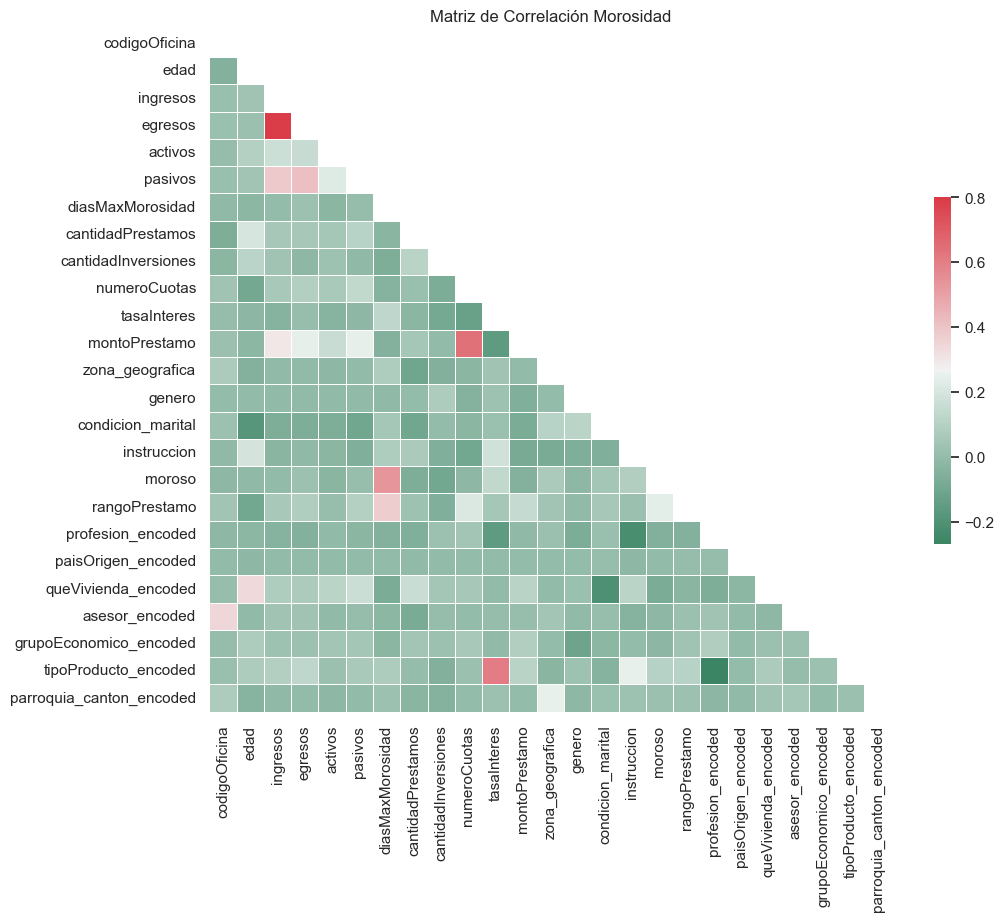

In [44]:
R = corrcoef(df_feat)

# Generate a mask for the upper triangle
sns.set(style="white")
mask = np.zeros_like(R, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(R, mask=mask, cmap=cmap, vmax=.8,
            square=True, xticklabels=names, yticklabels=names,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

ax.set_title("Matriz de Correlación Morosidad")

Análisis de componentes principales (PCA)

Con el fin de observar como están relacionadas las variables también podemos hacer una representación en PCA de las mismas

In [ ]:
df.info()

In [45]:
# Normalizar las características utilizando MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_feat)

# Aplicar Análisis de Componentes Principales (PCA)
estimator = PCA(n_components=2)
X_pca = estimator.fit_transform(features_norm)

# Imprimir los componentes lineales y la varianza explicada
print("Componentes lineales:\n", estimator.components_)
print("\nRatio de variabilidad: ", estimator.explained_variance_ratio_, "\n")

# Configurar el gráfico de dispersión
fig, ax = plt.subplots()

# Recorrer cada punto y etiquetarlo con el nombre correspondiente
for i in range(len(X_pca)):
    if i < len(names):
        plt.text(X_pca[i][0], X_pca[i][1], names[i])

# Establecer los límites del gráfico
plt.xlim(-2, 6)
plt.ylim(-1, 1.5)
ax.grid(True)
fig.tight_layout()

# Mostrar el gráfico
plt.show()


Componentes lineales:
 [[ 0.00346604  0.00330562  0.00339994 ...  0.00305666  0.00313945
   0.00336956]
 [-0.00192395 -0.00180202 -0.00230047 ... -0.00268953 -0.00126533
  -0.0006347 ]]

Ratio de variabilidad:  [0.84898209 0.09318186] 



C:\Users\arrob\AppData\Local\Temp\ipykernel_24188\1550430350.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


DBSCAN

El objetivo es identificar elementos outliers mediante la utilización de DBSCAN. El propósito de identificar ouliter es aislar aquellas características que son diferentes a los demás y que nos pueden ayudar a distinguir a los diferentes elementos a los que representan.

Parametrización

Vamos a fijar MinPts = 2 (en 3 genera uno o ningún cluster), y observar qué epsilon podemos establecer

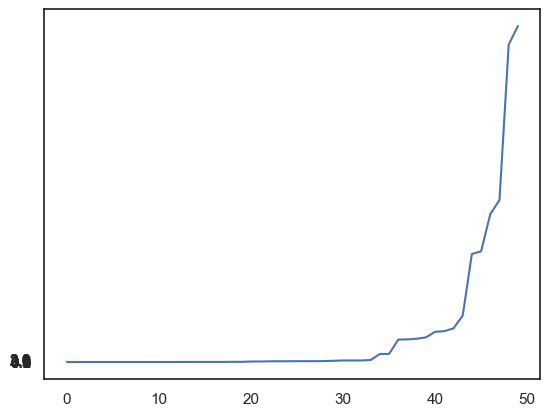

In [51]:
from sklearn.neighbors import kneighbors_graph
from scipy import cluster
import sklearn.metrics
dist = sklearn.metrics.DistanceMetric.get_metric('euclidean')
matdist= dist.pairwise(features_norm)
minPts = 2

A = kneighbors_graph(features_norm, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(features_norm):
    for j in range(len(features_norm)):
        if Ar[i][j] != 0:
            seq.append(matdist[i][j])

seq.sort()
# establecer intervalo ejes
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 120, 10))
ax.set_yticks(np.arange(0, 3, 0.2))

plt.plot(seq)


plt.show()

In [52]:
# EJECUCION
minPts=2
from sklearn.cluster import DBSCAN

for eps in np.arange(0.50, 1.8, 0.20):
  db = DBSCAN(eps, min_samples=minPts).fit(features_norm)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_outliers = list(labels).count(-1)
  print ("%6.2f, %d, %d" % (eps, n_clusters_, n_outliers))

  0.50, 1, 14
  0.70, 1, 11
  0.90, 1, 10
  1.10, 1, 10
  1.30, 1, 8
  1.50, 1, 8
  1.70, 1, 8


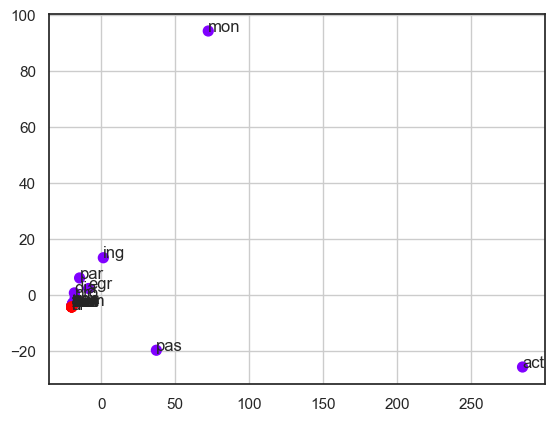

In [53]:
# Representacion con eps de 0.50
db = DBSCAN(eps=0.5, min_samples=minPts).fit(features_norm)
labels = db.labels_
labels

#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50, cmap="rainbow")
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i][0:3])
plt.grid()
plt.show()

In [54]:
# Identificar aquellos elementos que son outliers, son las caracteristicas que se usaran para el modelo
df_feat['dbscan_group'] = labels
df_feat[df_feat['dbscan_group'] == -1]

numeroCliente,717313,671424,846469,562325,74463,885835,772353,641603,733921,649519,...,847092,826697,887199,28469,816671,28049,696020,77929,691490,dbscan_group
codigoOficina,10.0,10.00,12.00,5.0,1.0,15.00,2.00,2.0,11.0,9.00,...,3.0,4.0,9.00,4.00,9.00,4.00,11.0,9.0,2.00,-1
edad,37.0,42.00,38.00,70.0,61.0,29.00,30.00,38.0,33.0,73.00,...,32.0,29.0,27.00,70.00,35.00,54.00,48.0,63.0,51.00,-1
ingresos,866.0,1645.00,3687.14,500.0,2500.0,460.00,651.00,750.0,360.0,3810.00,...,543.3,1572.0,1035.00,2000.00,2602.00,750.84,700.0,1850.0,1088.00,-1
egresos,549.0,892.00,1194.98,200.0,650.0,140.00,350.00,250.0,100.0,2849.00,...,210.0,409.0,521.00,693.00,2381.71,220.00,415.0,690.0,502.71,-1
activos,13500.0,58000.00,118700.00,0.0,101000.0,5000.00,5100.00,22795.0,0.0,170920.00,...,5000.0,41000.0,21700.00,23200.00,76905.00,84994.00,56000.0,63000.0,16300.00,-1
pasivos,10973.0,28000.00,86279.47,0.0,0.0,0.00,0.00,0.0,0.0,0.00,...,0.0,3500.0,10187.16,9363.97,33955.60,0.00,9240.0,6200.0,7079.40,-1
diasMaxMorosidad,27.0,32.00,68.00,116.0,20.0,0.00,144.00,18.0,0.0,0.00,...,0.0,3.0,0.00,7.00,78.00,18.00,166.0,5.0,3.00,-1
numeroCuotas,24.0,72.00,60.00,30.0,12.0,48.00,30.00,36.0,12.0,60.00,...,60.0,33.0,72.00,16.00,36.00,41.00,6.0,36.0,18.00,-1
tasaInteres,15.0,15.25,14.99,23.0,12.0,14.99,18.50,12.5,23.3,18.59,...,14.5,19.5,14.25,17.90,14.99,19.50,22.0,15.5,15.00,-1
montoPrestamo,3000.0,10000.00,20000.00,6000.0,2000.0,5000.00,4701.86,8816.0,1000.0,20000.00,...,5100.0,3060.0,11500.00,15450.00,3038.23,9000.00,500.0,9500.0,4650.00,-1


In [58]:
selected_features = ['codigoOficina', 'edad', 'ingresos', 'egresos','activos','pasivos', 'diasMaxMorosidad', 'numeroCuotas', 'tasaInteres',
                     'montoPrestamo', 'profesion_encoded', 'asesor_encoded', 'grupoEconomico_encoded', 'parroquia_canton_encoded']

In [ ]:
df.info()

Dividir los datos en Entrenamiento, validacion y Test

In [ ]:
df_pca.info()

In [ ]:
df_pca.columns

In [70]:
# Separar las características (X) de la variable objetivo (y)
X = df_pca.drop('moroso', axis=1)
y = df_pca['moroso']

# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
train, test, train_clase, test_clase = train_test_split(
    X, y,
    test_size=0.2,  # Aquí establecemos el tamaño del conjunto de prueba al 20%
    random_state=42
)

In [63]:
# Imprimir tamaños de los conjuntos resultantes
print("Tamaño del conjunto de entrenamiento:", len(train))
print("Tamaño del conjunto de prueba:", len(test))

Tamaño del conjunto de entrenamiento: 79468
Tamaño del conjunto de prueba: 19868


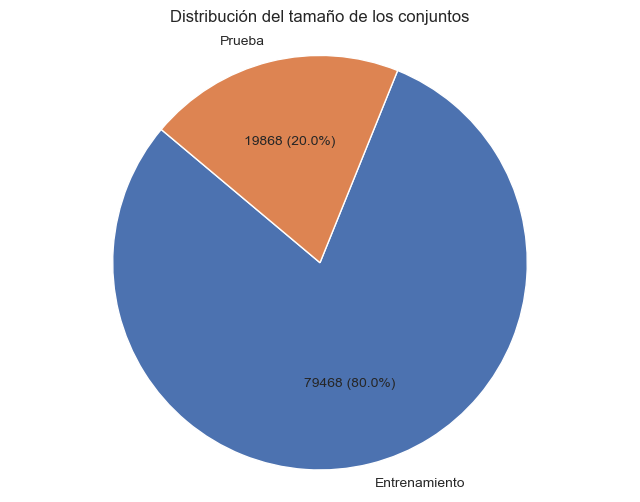

In [67]:
# Tamaños de los conjuntos
tamanos = [len(train), len(test)]
nombres = ['Entrenamiento',  'Prueba']

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(tamanos, labels=nombres, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(tamanos) / 100, p),
        startangle=140, textprops={'fontsize': 10})
plt.axis('equal')  # Para asegurar que el gráfico de pastel sea circular
plt.title('Distribución del tamaño de los conjuntos')
plt.show()

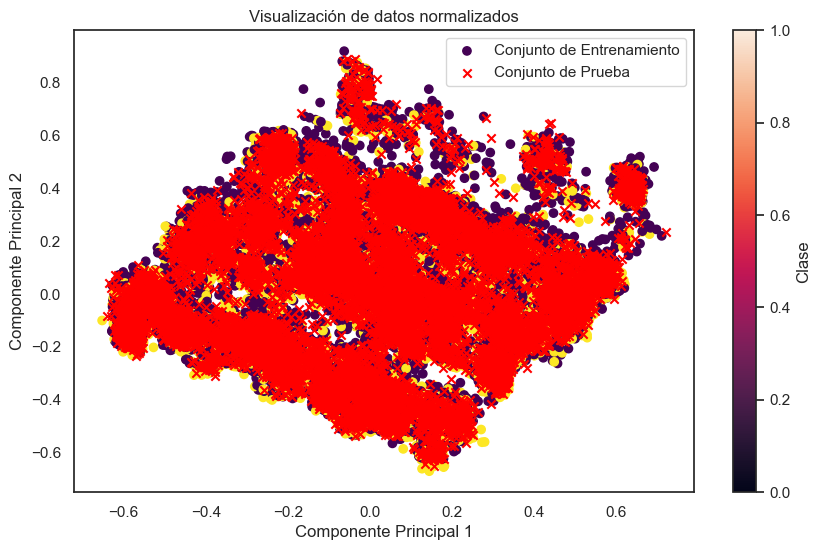

In [72]:
# Normalización con MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(train[selected_features])
X_test_scaled = scaler.transform(test[selected_features])
y_train = train_clase
y_test = test_clase
# Reducción de dimensionalidad con PCA
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
# Graficar los datos normalizados en dos dimensiones
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', label='Conjunto de Entrenamiento')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c='red', marker='x', label='Conjunto de Prueba')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de datos normalizados')
plt.legend()
plt.colorbar(label='Clase')
plt.show()

In [73]:
pca.explained_variance_ratio_

array([0.21307326, 0.1883938 , 0.1505967 , 0.12408217, 0.11123181,
       0.07158371, 0.05568563])

In [74]:
# Porcentaje de la varianza de datos
round(sum(pca.explained_variance_ratio_)*100,2) 

91.46

MODELADO

KNN

Este algoritmo se basa en los vecinos mas cercanos, para nuestro caso utilizamos hiperparametros que es el numero de vecinos es 7.

In [ ]:
val.info()

In [76]:
#HiperParametros
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20],  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Peso de los vecinos (uniforme o ponderado por la distancia)
    'metric': ['euclidean', 'manhattan']  # Métrica de distancia
}

# Crear el modelo base
model = KNeighborsRegressor()

# Inicializar Grid Search Cross-Validation con la cuadrícula de hiperparámetros
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')

# Realizar la búsqueda de hiperparámetros en el conjunto de entrenamiento
grid_search.fit(X_train_pca, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Obtener el mejor modelo entrenado
best_model = grid_search.best_estimator_
print(best_model)

# Realizar predicciones sobre el conjunto de prueba utilizando el mejor modelo
#y_pred = best_model.predict(X_test_pca)

Mejores hiperparámetros encontrados:
{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
KNeighborsRegressor(metric='euclidean', n_neighbors=11, weights='distance')


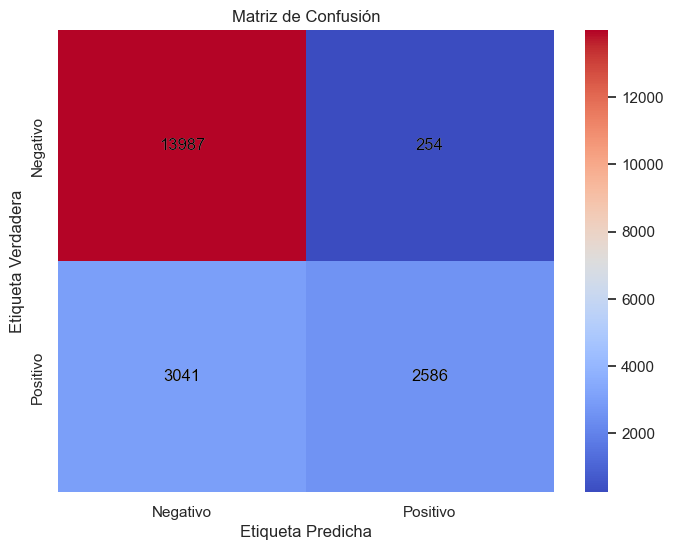

Verdaderos Negativos: 13987
Falsos Positivos: 254
Falsos Negativos: 3041
Verdaderos Positivos: 2586
METRICAS DE EVALUACION EN PORCENTAJE
Precisión (Precision): 91.06
Sensibilidad (Recall): 45.96
Exactitud (Accuracy): 83.42


In [79]:
#Ejecución del algoritmo de ML KNN y generación de su modelo
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score


# Crear y entrenar el modelo
n_neighbors = 11
weights = 'distance'
metric = 'euclidean'
model = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights, metric=metric)
model.fit(X_train_pca, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test_pca)

# Discretizar las predicciones y las etiquetas verdaderas
y_pred_discrete = np.round(y_pred)  # Redondear las predicciones a números enteros
y_test_discrete = np.round(y_test)  # Discretizar las etiquetas verdaderas

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test_discrete, y_pred_discrete)

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="coolwarm", fmt="d")

# Añadir etiquetas y ajustar el aspecto del gráfico
plt.title("Matriz de Confusión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.xticks(ticks=[0.5, 1.5], labels=["Negativo", "Positivo"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negativo", "Positivo"])
plt.gca().set_ylim(2, 0)  # Invertir el eje Y para que las etiquetas estén en el orden correcto

# Añadir anotaciones de texto para mostrar el número de instancias en cada celda
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha="center", va="center", color="black")

plt.show()

# Obtener los valores específicos de la matriz de confusión
verdadero_negativo = conf_matrix[0, 0]
falso_positivo = conf_matrix[0, 1]
falso_negativo = conf_matrix[1, 0]
verdadero_positivo = conf_matrix[1, 1]

# Imprimir los valores específicos
print("Verdaderos Negativos:", verdadero_negativo)
print("Falsos Positivos:", falso_positivo)
print("Falsos Negativos:", falso_negativo)
print("Verdaderos Positivos:", verdadero_positivo)

# Calcular las métricas de evaluación
precision = precision_score(y_test_discrete, y_pred_discrete)
recall = recall_score(y_test_discrete, y_pred_discrete)
accuracy = accuracy_score(y_test_discrete, y_pred_discrete)

# Imprimir las métricas de evaluación
print("METRICAS DE EVALUACION EN PORCENTAJE")
print("Precisión (Precision):", round(precision*100,2))
print("Sensibilidad (Recall):", round(recall*100,2))
print("Exactitud (Accuracy):", round(accuracy*100,2))

ARBOLES

El objetivo principal de este algoritmo es crear un modelo que prediga el valor de una variable de destino mediante el aprendizaje de reglas de decisión simples deducidas de las características de los datos.

In [77]:
# Hiperparámetros para el modelo de árboles de decisión
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'splitter': ['best', 'random'],  # Estrategia utilizada para elegir la división en cada nodo
    'min_samples_split': [2, 5, 10]  # Número mínimo de muestras requeridas para dividir un nodo interno
}

# Crear el modelo base
model = DecisionTreeRegressor()

# Inicializar Grid Search Cross-Validation con la cuadrícula de hiperparámetros
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')

# Realizar la búsqueda de hiperparámetros en el conjunto de entrenamiento
grid_search.fit(X_train_pca, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Obtener el mejor modelo entrenado
best_model = grid_search.best_estimator_
print(best_model)

Mejores hiperparámetros encontrados:
{'min_samples_split': 10, 'splitter': 'random'}
DecisionTreeRegressor(min_samples_split=10, splitter='random')


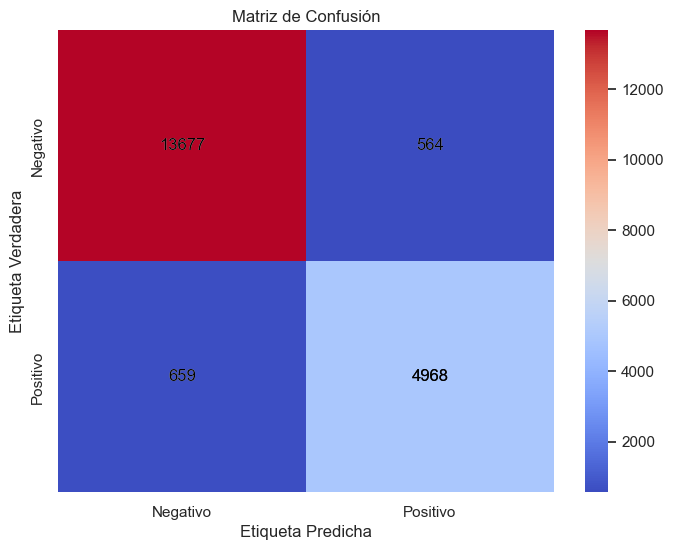

Verdaderos Negativos: 13677
Falsos Positivos: 564
Falsos Negativos: 659
Verdaderos Positivos: 4968
METRICAS DE EVALUACION EN PORCENTAJE
Precisión (Precision): 89.8
Sensibilidad (Recall): 88.29
Exactitud (Accuracy): 93.84


In [80]:
#Ejecución del algoritmo de ML Arboles y generación de su modelo
# Nombre del modelo: "B"
from sklearn import tree
model = tree.DecisionTreeRegressor(splitter="random", min_samples_split=10)
model.fit(X_train, y_train)

# Predicción sobre el conjunto de test
y_pred = model.predict(X_test)


# Discretizar las predicciones y las etiquetas verdaderas
y_pred_discrete = np.round(y_pred)  # Redondear las predicciones a números enteros
y_test_discrete = np.round(y_test)  # Discretizar las etiquetas verdaderas

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test_discrete, y_pred_discrete)

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="coolwarm", fmt="d")

# Añadir etiquetas y ajustar el aspecto del gráfico
plt.title("Matriz de Confusión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.xticks(ticks=[0.5, 1.5], labels=["Negativo", "Positivo"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negativo", "Positivo"])
plt.gca().set_ylim(2, 0)  # Invertir el eje Y para que las etiquetas estén en el orden correcto

# Añadir anotaciones de texto para mostrar el número de instancias en cada celda
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha="center", va="center", color="black")

plt.show()

# Obtener los valores específicos de la matriz de confusión
verdadero_negativo = conf_matrix[0, 0]
falso_positivo = conf_matrix[0, 1]
falso_negativo = conf_matrix[1, 0]
verdadero_positivo = conf_matrix[1, 1]

# Imprimir los valores específicos
print("Verdaderos Negativos:", verdadero_negativo)
print("Falsos Positivos:", falso_positivo)
print("Falsos Negativos:", falso_negativo)
print("Verdaderos Positivos:", verdadero_positivo)

# Calcular las métricas de evaluación
precision = precision_score(y_test_discrete, y_pred_discrete)
recall = recall_score(y_test_discrete, y_pred_discrete)
accuracy = accuracy_score(y_test_discrete, y_pred_discrete)

# Imprimir las métricas de evaluación
print("METRICAS DE EVALUACION EN PORCENTAJE")
print("Precisión (Precision):", round(precision*100,2))
print("Sensibilidad (Recall):", round(recall*100,2))
print("Exactitud (Accuracy):", round(accuracy*100,2))

SVM

In [82]:
# Definir la cuadrícula de hiperparámetros a explorar
from sklearn.svm import SVC
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  # Parámetro de regularización C
    'gamma': [0.01, 0.1, 1, 10],  # Coeficiente de kernel para 'rbf'
    'kernel': ['linear', 'rbf']  # Tipo de kernel
}

# Crear el modelo SVM
model_svm = SVC()

# Inicializar Grid Search Cross-Validation con la cuadrícula de hiperparámetros
grid_search_svm = GridSearchCV(estimator=model_svm, param_grid=param_grid_svm, cv=10, scoring='accuracy')

# Realizar la búsqueda de hiperparámetros en el conjunto de entrenamiento
grid_search_svm.fit(X_train_pca, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados para SVM:")
print(grid_search_svm.best_params_)

# Obtener el mejor modelo entrenado
best_model_svm = grid_search_svm.best_estimator_

# Realizar predicciones sobre el conjunto de prueba utilizando el mejor modelo SVM
y_pred_svm = best_model_svm.predict(X_test)

Mejores hiperparámetros encontrados para SVM:
{'C': 100, 'gamma': 1, 'kernel': 'rbf'}


E:\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


ValueError: X has 24 features, but SVC is expecting 7 features as input.

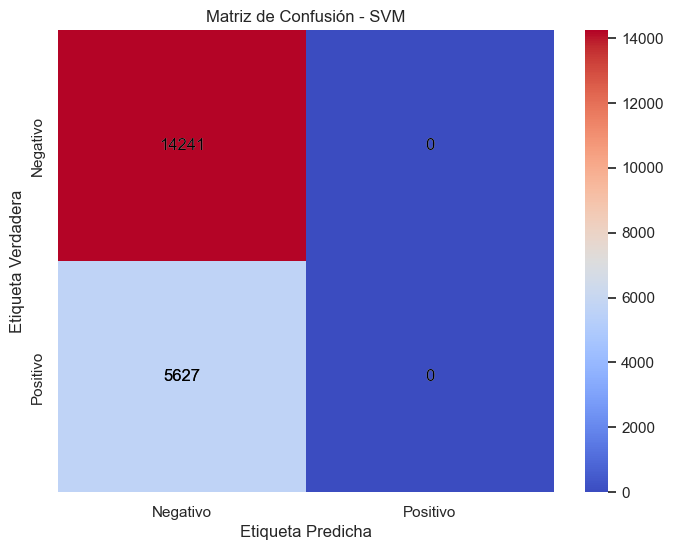

Verdaderos Negativos (SVM): 14241
Falsos Positivos (SVM): 0
Falsos Negativos (SVM): 5627
Verdaderos Positivos (SVM): 0
METRICAS DE EVALUACION EN PORCENTAJE PARA SVM
Precisión (Precision): 0.0
Sensibilidad (Recall): 0.0
Exactitud (Accuracy): 71.68


E:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
# Importar el modelo SVC de SVM
from sklearn.svm import SVC

# Crear el modelo SVM con los mejores parámetros encontrados
best_model_svm = SVC(C=100, gamma=1, kernel='rbf')

# Entrenar el modelo SVM con los datos de entrenamiento
best_model_svm.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred_svm = best_model_svm.predict(X_test)

# Calcular la matriz de confusión para SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Crear el mapa de calor para la matriz de confusión de SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, cmap="coolwarm", fmt="d")

# Añadir etiquetas y ajustar el aspecto del gráfico
plt.title("Matriz de Confusión - SVM")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.xticks(ticks=[0.5, 1.5], labels=["Negativo", "Positivo"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negativo", "Positivo"])
plt.gca().set_ylim(2, 0)  # Invertir el eje Y para que las etiquetas estén en el orden correcto

# Añadir anotaciones de texto para mostrar el número de instancias en cada celda
for i in range(conf_matrix_svm.shape[0]):
    for j in range(conf_matrix_svm.shape[1]):
        plt.text(j + 0.5, i + 0.5, conf_matrix_svm[i, j], ha="center", va="center", color="black")

plt.show()

# Obtener los valores específicos de la matriz de confusión para SVM
verdadero_negativo_svm = conf_matrix_svm[0, 0]
falso_positivo_svm = conf_matrix_svm[0, 1]
falso_negativo_svm = conf_matrix_svm[1, 0]
verdadero_positivo_svm = conf_matrix_svm[1, 1]

# Imprimir los valores específicos de la matriz de confusión para SVM
print("Verdaderos Negativos (SVM):", verdadero_negativo_svm)
print("Falsos Positivos (SVM):", falso_positivo_svm)
print("Falsos Negativos (SVM):", falso_negativo_svm)
print("Verdaderos Positivos (SVM):", verdadero_positivo_svm)

# Calcular las métricas de evaluación para SVM
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Imprimir las métricas de evaluación para SVM
print("METRICAS DE EVALUACION EN PORCENTAJE PARA SVM")
print("Precisión (Precision):", round(precision_svm*100,2))
print("Sensibilidad (Recall):", round(recall_svm*100,2))
print("Exactitud (Accuracy):", round(accuracy_svm*100,2))

XGBoost

In [83]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a explorar
parametros_xgb = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el ensamble
    'max_depth': [3, 6, 9],  # Profundidad máxima de cada árbol
    'learning_rate': [0.01, 0.1, 0.3],  # Tasa de aprendizaje
    'gamma': [0, 0.1, 0.2],  # Parámetro de penalización por complejidad del árbol
    'subsample': [0.5, 0.8, 1],  # Proporción de muestras utilizadas para entrenar cada árbol
    'colsample_bytree': [0.5, 0.8, 1]  # Proporción de características utilizadas para entrenar cada árbol
}

# Crear el modelo XGBoost
modelo_xgb = XGBClassifier()

# Inicializar Grid Search Cross-Validation con la cuadrícula de hiperparámetros
grid_search_xgb = GridSearchCV(estimator=modelo_xgb, param_grid=parametros_xgb, cv=10, scoring='accuracy')

# Realizar la búsqueda de hiperparámetros en el conjunto de entrenamiento
grid_search_xgb.fit(X_train_pca, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search_xgb.best_params_)

Mejores hiperparámetros encontrados:
{'colsample_bytree': 1, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.5}


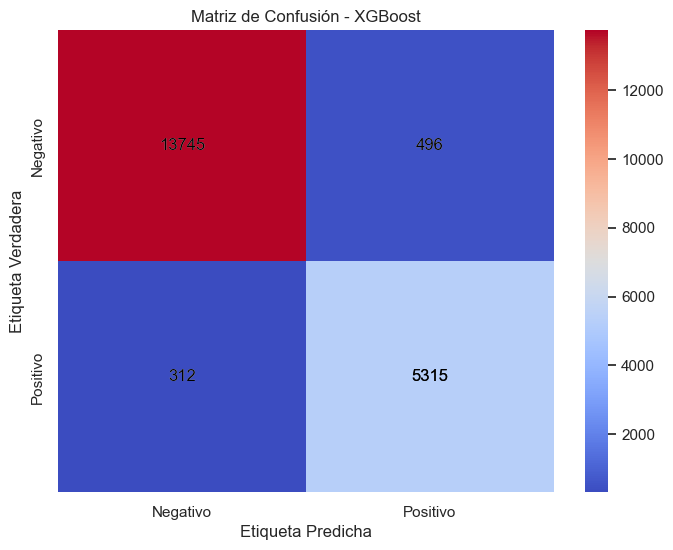

Verdaderos Negativos (XGBoost): 13745
Falsos Positivos (XGBoost): 496
Falsos Negativos (XGBoost): 312
Verdaderos Positivos (XGBoost): 5315
METRICAS DE EVALUACION EN PORCENTAJE PARA XGBoost
Precisión (Precision): 91.46
Sensibilidad (Recall): 94.46
Exactitud (Accuracy): 95.93


In [86]:
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Crear el modelo XGBoost
model_xgb = xgb.XGBClassifier(colsample_bytree = 1, gamma = 0.2, learning_rate = 0.1, max_depth = 9, n_estimators = 300, subsample = 0.5)

# Entrenar el modelo XGBoost con los datos de entrenamiento
model_xgb.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred_xgb = model_xgb.predict(X_test)

# Calcular la matriz de confusión para XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Crear el mapa de calor para la matriz de confusión de XGBoost
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, cmap="coolwarm", fmt="d")

# Añadir etiquetas y ajustar el aspecto del gráfico
plt.title("Matriz de Confusión - XGBoost")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.xticks(ticks=[0.5, 1.5], labels=["Negativo", "Positivo"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negativo", "Positivo"])
plt.gca().set_ylim(2, 0)  # Invertir el eje Y para que las etiquetas estén en el orden correcto

# Añadir anotaciones de texto para mostrar el número de instancias en cada celda
for i in range(conf_matrix_xgb.shape[0]):
    for j in range(conf_matrix_xgb.shape[1]):
        plt.text(j + 0.5, i + 0.5, conf_matrix_xgb[i, j], ha="center", va="center", color="black")

plt.show()

# Obtener los valores específicos de la matriz de confusión para XGBoost
verdadero_negativo_xgb = conf_matrix_xgb[0, 0]
falso_positivo_xgb = conf_matrix_xgb[0, 1]
falso_negativo_xgb = conf_matrix_xgb[1, 0]
verdadero_positivo_xgb = conf_matrix_xgb[1, 1]

# Imprimir los valores específicos de la matriz de confusión para XGBoost
print("Verdaderos Negativos (XGBoost):", verdadero_negativo_xgb)
print("Falsos Positivos (XGBoost):", falso_positivo_xgb)
print("Falsos Negativos (XGBoost):", falso_negativo_xgb)
print("Verdaderos Positivos (XGBoost):", verdadero_positivo_xgb)

# Calcular las métricas de evaluación para XGBoost
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Imprimir las métricas de evaluación para XGBoost
print("METRICAS DE EVALUACION EN PORCENTAJE PARA XGBoost")
print("Precisión (Precision):", round(precision_xgb*100,2))
print("Sensibilidad (Recall):", round(recall_xgb*100,2))
print("Exactitud (Accuracy):", round(accuracy_xgb*100,2))


In [ ]:
import joblib

# Guardar el modelo entrenado en un archivo
joblib.dump(model_xgb, 'modelo_xgboost.pkl')

In [ ]:
# Suponiendo que 'nuevo_dato' es un array con las características del nuevo dato
nuevo_dato = [[10, 37, 866.00, 549.00,13500.0,10973.00, 27, 24, 15,3000.00,73, 34, 23, 285]] #0
#nuevo_dato = [[12, 38, 3687.14, 1194.98,118700.0,86279.47, 68, 60, 14.99,20000.00,154, 19, 42, 173]] #1
#nuevo_dato = [[10, 42, 1645.00, 892.00,58000.0.0,86279.47, 68, 60, 14.99,20000.00,154, 19, 42, 173]] #0
# Cargar el modelo desde el archivo
modelo_cargado = joblib.load('modelo_xgboost.pkl')

# Realizar la predicción con el modelo cargado
prediccion_nuevo_dato = modelo_cargado.predict(nuevo_dato)

# Imprimir la predicción
print("La predicción para el nuevo dato es:", prediccion_nuevo_dato)

In [ ]:
# Suponiendo que 'df' es tu DataFrame y la lista de campos que quieres mostrar es 'campos_mostrar'
campos_mostrar = ['moroso','codigoOficina', 'edad', 'ingresos', 'egresos', 'activos', 'pasivos', 'diasMaxMorosidad',
                  'numeroCuotas', 'tasaInteres', 'montoPrestamo', 'profesion_encoded', 'asesor_encoded',
                  'grupoEconomico_encoded', 'parroquia_canton_encoded']

# Seleccionar y mostrar solo los campos especificados
df_seleccionado = df.loc[:, campos_mostrar]
df_seleccionado